<a href="https://colab.research.google.com/github/MartinPdeS/PyMieSim/blob/master/PyMieSim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build latest package version
============================


In [1]:
!python -m pip install PyMieSim --no-cache-dir --quiet

Experiment imports
------------------

In [2]:
from PyMieSim import experiment
import numpy as np
from PyMieSim.experiment.scatterer import Sphere
from PyMieSim.experiment.source import Gaussian
from PyMieSim.experiment.detector import Photodiode
from PyMieSim.experiment import Setup, measure

Scattering efficiency VS scatterer diameter
-------------------------------------------

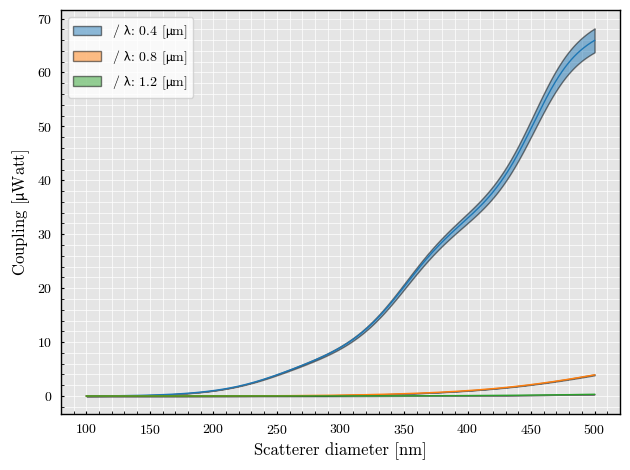

In [7]:
source = Gaussian(
    wavelength=[400e-9, 800e-9, 1200e-9],
    polarization=0,
    NA=0.3,
    optical_power=1e-3
)

scatterer = Sphere(
    diameter=np.linspace(100e-9, 500e-9, 500),
    index=1.44,
    medium_index=1,
    source=source
)

detector = Photodiode(
    NA=[0.2],
    phi_offset=np.linspace(-10, 10, 10),
    gamma_offset=30,
    sampling=[1000],
    polarization_filter=0
)

experiment = Setup(
    source=source,
    scatterer=scatterer,
    detector=detector
)

DataSet = experiment.get(measure.coupling)

figure = DataSet.plot(
    x=scatterer.diameter,
    std=detector.phi_offset
)